 # Olympics Project

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

### Import the libraries

In [2]:
#import important librariers to conduct your analaysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [6]:
#load the dataset
data = pd.read_csv('/content/athlete_events.csv')


### Don't forget to drop duplicates first

In [7]:
#dropping duplicates in the dataset
data.drop_duplicates(inplace=True)
#we use (inplace = true) to create a new dataset with no duplicates


### Find the missing data in each column

In [8]:
#Find the missing data in each column
missing_data = data.isnull().sum()
print(missing_data)

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64


### Number of males and females

In [9]:
#Finding number of males and females in the sex column using value_counts() method
male = data['Sex'].value_counts()['M']
female = data['Sex'].value_counts()['F']
print("Number of males:", male)
print("Number of females:", female)

#or by storing in a list then counting
#male = list(data['Sex']).count('M')
#female = list(data['Sex']).count('F')
#print("Number of males:", male)
#print("Number of females:", female)


Number of males: 195353
Number of females: 74378


### How many cities do we have and what are they ?

In [10]:
#subsetting the data frame to count the unique values of all cities
print("Total number of unique cities:",data['City'].nunique())
#The cities
print(data['City'].value_counts())

Total number of unique cities: 42
City
London                    22297
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Seoul                     12037
Los Angeles               11919
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7008
Berlin                     6251
Sochi                      4891
Melbourne                  4829
Amsterdam                  4656
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
C

### Find the number of athlete for each year

In [11]:
# By grouping the athletes by year and counting IDs we get the total number of athletes per year
print(data.groupby('Year')['ID'].count())

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: ID, dtype: int64


### Which athlete participated the most? (his/her name and ID)

In [12]:
#First we count each name and id, then by using idxmax() which returns the max name and id
most_participated = data['Name'].value_counts().idxmax()
most_participated_id = data['ID'].value_counts().idxmax()
print("ID:" , most_participated_id)
print("Name:" , most_participated)



ID: 106296
Name: Heikki Ilmari Savolainen


### Find the number of each medal for each year.
##### The output should look like this
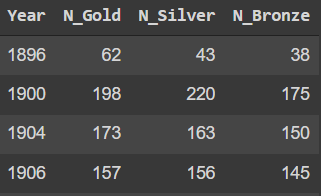

In [52]:
#subset the data frame and name it to medals
medals = data.groupby('Year')['Medal'].value_counts().unstack(level='Medal')
#rename the columns
medals = medals.rename(columns={"Gold": "N_Gold", "Silver": "N_Silver", "Bronze": "N_Bronze"})
#swap the columns to get them in order
medals = medals[['N_Gold', 'N_Silver', 'N_Bronze']]
#print the first 4 olymipcs using head
medals.head(4)


Medal,N_Gold,N_Silver,N_Bronze
Year,,,
1896,62,43,38
1900,198,220,175
1904,173,163,150
1906,157,156,145


### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

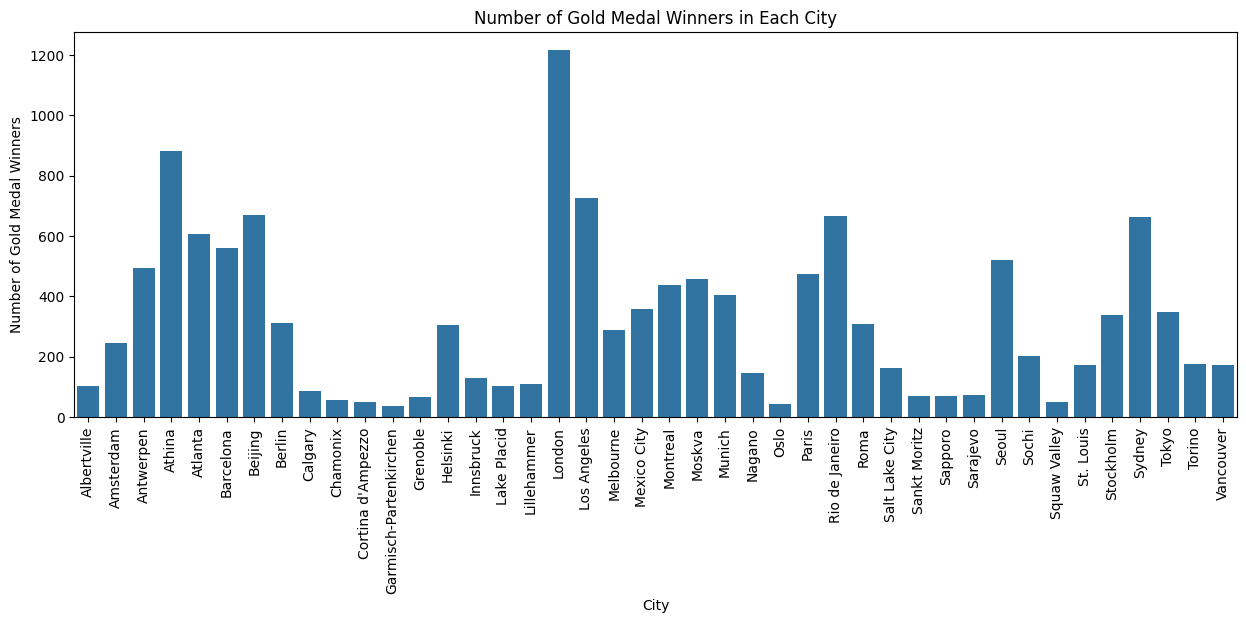

In [67]:
# subset the data frame
winners = data[data['Medal'] == 'Gold'].groupby('City')['ID'].count()
# Plot the results using matplotlib, our data is obj and int so we use a bar chart
plt.figure(figsize=(15, 5))
#using seaborn we create a bar plot, fiaxating the cities on the x axis and the numbers on the y axis
sns.barplot(x=winners.index, y=winners.values)
#rotate the x-values (city names) to view them properly
plt.xticks(rotation=90)
#adding labels to better understand the plot
plt.xlabel('City')
plt.ylabel('Number of Gold Medal Winners')
plt.title('Number of Gold Medal Winners in Each City')
plt.show()

### Find the total missing data for each year?

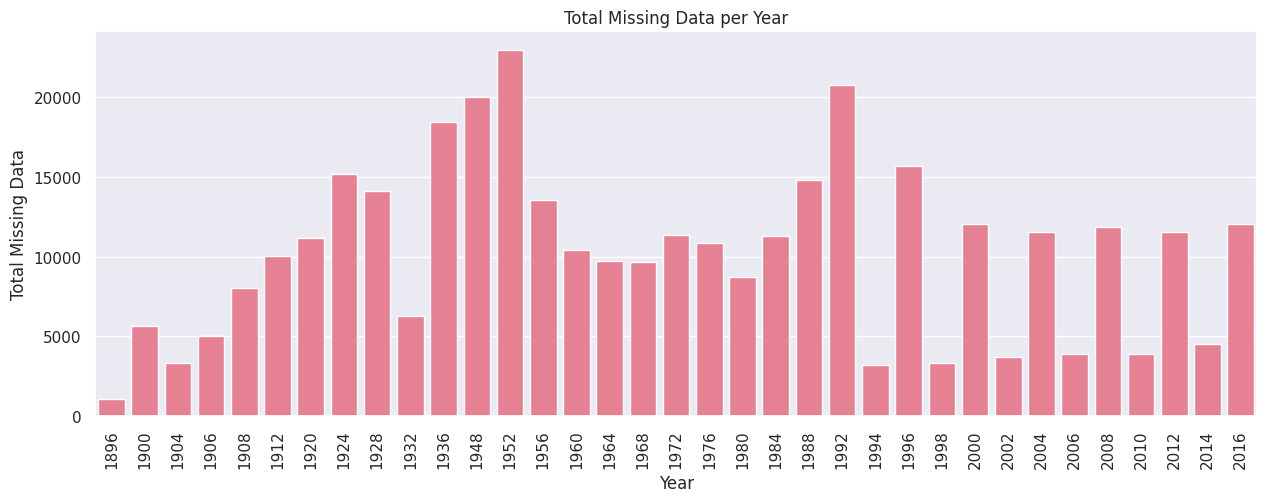

In [106]:
#To calculate the missing data in all columns, we use the lambda function
#given x will check if the data is null (x:x.isnull()) and we use 2 (.sum())methods to count all columns
missing_data_per_year = data.groupby('Year').apply(lambda x: x.isnull().sum().sum())
# Plot the results in a bar chart for better visuals
plt.figure(figsize=(15, 5))
#set the x and y axis
sns.barplot(x=missing_data_per_year.index, y=missing_data_per_year.values)
#plot customization
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")
# we rotate the x axis so the the text doesnt overlap
plt.xticks(rotation=90)
#adding labels to better understand the plot
plt.xlabel('Year')
plt.ylabel('Total Missing Data')
plt.title('Total Missing Data per Year')
plt.show()


### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

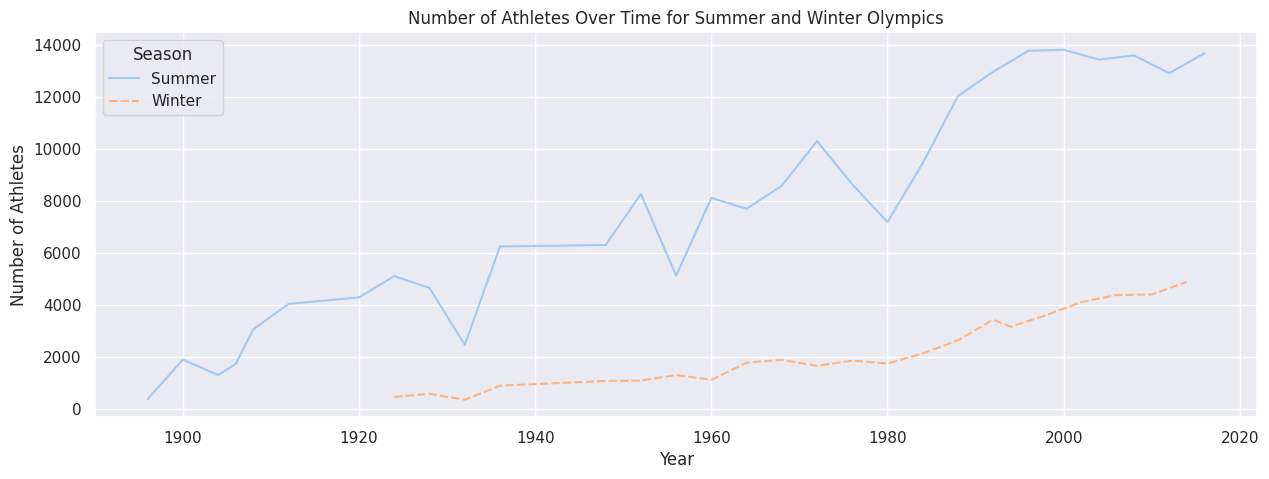

In [107]:
#grou the data by
athletes_over_time = data.groupby(['Year', 'Season'])['ID'].count().unstack()

# Plot the results
plt.figure(figsize=(15, 5))
sns.lineplot(data=athletes_over_time)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes Over Time for Summer and Winter Olympics')
plt.show()
